In [1]:
import pandas as pd
import networkx as nx
from collections import Counter
from metric_util_func_py import *
%matplotlib inline

In [2]:
folder="../dataset_v5/v5_2/v5_2_2/"
save_dir = "../shodh_aft_graphs"

In [3]:
def get_shodhganga_graph():
    mod_ment2 = pd.read_csv(folder+'final_shodhganga_dataset_v5_2_7_2.csv', sep =",")
    graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','publisher_institution', create_using=nx.DiGraph())
    graph1.remove_edges_from(nx.selfloop_edges(graph1))
    cycle  = list(nx.simple_cycles(graph1))
    graph1.remove_edges_from(cycle)
    print(f"Shodhganga Nodes: {len(graph1.nodes())}")
    print(f"Shodhganga Edges: {len(graph1.edges())}")
    return graph1

In [4]:
def get_aft_graph():
    connect= pd.read_csv("/home/dj/genelogy_tree/neurotree/neurotree_all_2018-05-06_export/neurotree_all_2018-05-06_export_connect.tsv",sep='\t',encoding='latin-1',low_memory=False)
    people = pd.read_csv("/home/dj/genelogy_tree/neurotree/neurotree_all_2018-05-06_export/neurotree_all_2018-05-06_export_people.tsv",sep='\t',encoding='latin-1',low_memory=False)
    pg_people = connect[((connect["relation"]==1) & (connect["pid2"]>0))].copy()
    del connect
    del people
    graph1 = nx.convert_matrix.from_pandas_edgelist(pg_people, 'pid2','pid1','location', create_using=nx.DiGraph())
    graph1.remove_edges_from(nx.selfloop_edges(graph1))
    cycle  = list(nx.simple_cycles(graph1))
    graph1.remove_edges_from(cycle)
    print(f"AFT Nodes: {len(graph1.nodes())}")
    print(f"AFT Edges: {len(graph1.edges())}")
    return graph1

In [5]:
def draw_bar_graph1(metric1, metric2, title='',ylabel='Researcher Frequency',xlabel='not provided',  bins=10, loc="", text=False, print_bin=False):
    #counts, bins = np.histogram(metric_value_list)
    plt.figure(figsize=(12,8))
    ax = plt.axes()
    n1,bins1,container1=plt.hist(metric1, bins=bins,color='blue',density=False,log=True,rwidth=0.95, label="AFT")#  alpha=0.7
    n2,bins2,container2=plt.hist(metric2, bins=bins1,color='green',density=False,log=True,rwidth=0.95, label="Shodhganga-AGN")#  alpha=0.7
    
    plt.yticks(fontsize=16,fontweight='bold')
    plt.xticks(fontsize=16,fontweight='bold')
    plt.title(title)
    plt.ylabel(ylabel,fontweight='bold', fontsize=20) #fontsize=18
    plt.xlabel(xlabel,fontweight='bold', fontsize=20)
    plt.legend()
    if text:
        for i1,v1 in zip(bins1[0:-1], n1):
            if v1 > 0:
                plt.text(i1, v1, str(int(v1)), color='purple', fontweight='bold',fontsize=16)
        for i2,v2 in zip(bins2[0:-1], n2):
            if v2 > 0:
                plt.text(i2, v2, str(int(v2)), color='orange', fontweight='bold',fontsize=16)
    if print_bin:
        ax.set_xticks([int(d) for d in bins1])
        ax.set_xticklabels([int(b) for b in bins1])
    #plt.xticks(bins[0::5])
    plt.savefig(loc,bbox_inches='tight')
    plt.show()
    #print(n)
    #print(bins)
    return

In [6]:
def draw_line_graph1(metric1, metric2, title="",xlabel="",ylabel="Researcher Frequency",loc=''):
    metric_dist1 = Counter(metric1)
    metric_dist2 = Counter(metric2)
    metric_dist1_sort=sorted(metric_dist1.items())
    metric_dist2_sort=sorted(metric_dist2.items())
    deg1, cnt1 = zip(*metric_dist1_sort)
    deg2, cnt2 = zip(*metric_dist2_sort)
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(deg1, cnt1, color="b", label="AFT")
    plt.plot(deg2, cnt2, color="g", label="Shodhganga-AGN")
    plt.title(title)
    plt.ylabel(ylabel,fontweight='bold', fontsize=20)
    plt.xlabel(xlabel,fontweight='bold', fontsize=20)
    plt.yscale('log')
    plt.legend()
    #ax.set_xticks([d for d in deg])
    #ax.set_xticklabels(deg)
    plt.savefig(loc,bbox_inches='tight')
    plt.show()
#     print(deg)
#     print(cnt)
    return

In [7]:
def draw_scatter_graph1(metric1, metric2, title="",xlabel="",ylabel="Researcher Frequency",loc=''):
    metric_dist1 = Counter(metric1)
    metric_dist2 = Counter(metric2)
    metric_dist1_sort=sorted(metric_dist1.items())
    metric_dist2_sort=sorted(metric_dist2.items())
    deg1, cnt1 = zip(*metric_dist1_sort)
    deg2, cnt2 = zip(*metric_dist2_sort)
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(deg1, cnt1, color="b", label="AFT")
    plt.scatter(deg2, cnt2, color="g", label="Shodhganga-AGN")
    plt.title(title)
    plt.ylabel(ylabel,fontweight='bold', fontsize=20)
    plt.xlabel(xlabel,fontweight='bold', fontsize=20)
    plt.yscale('log')
    plt.legend(prop={'size': 20,'weight':'bold'})
    #ax.set_xticks([d for d in deg])
    #ax.set_xticklabels(deg)
    plt.savefig(loc,bbox_inches='tight')
    plt.show()
#     print(deg)
#     print(cnt)
    return

In [8]:
def draw_graphs(aft_values, shodh_values,title="",xlabel="",bins=10, loc=""):
    draw_bar_graph1(aft_values,shodh_values,xlabel=xlabel,loc=loc+"_bar.pdf", bins=bins, text=True,print_bin=True)
    draw_scatter_graph1(aft_values, shodh_values,xlabel=xlabel, loc=loc+"_scatter.pdf")
    draw_line_graph1(aft_values, shodh_values, xlabel=xlabel, loc=loc+"_line.pdf")
    return

In [9]:
aft   = get_aft_graph()

AFT Nodes: 643127
AFT Edges: 554018


In [10]:
shodh = get_shodhganga_graph()

Shodhganga Nodes: 256725
Shodhganga Edges: 201250


In [11]:
shodh_fecund = shodh.out_degree()
shodh_fecund = dict(shodh_fecund)
shodh_fecund = list(shodh_fecund.values())

In [12]:
aft_fecund = aft.out_degree()
aft_fecund = dict(aft_fecund)
aft_fecund = list(aft_fecund.values())

In [125]:
# n,bins,container=plt.hist(aft_fecund, bins=10,color='green',density=False,log=True,rwidth=0.95)
# n,bins,container=plt.hist(shodh_fecund, bins=10,color='blue',density=False,log=True,rwidth=0.95)

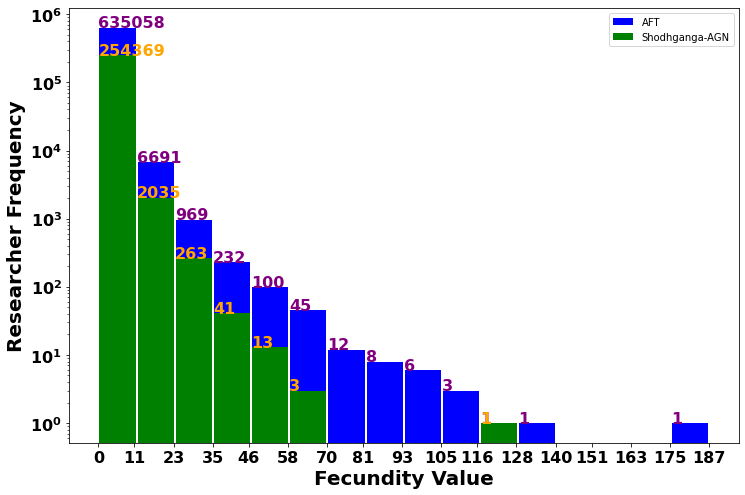

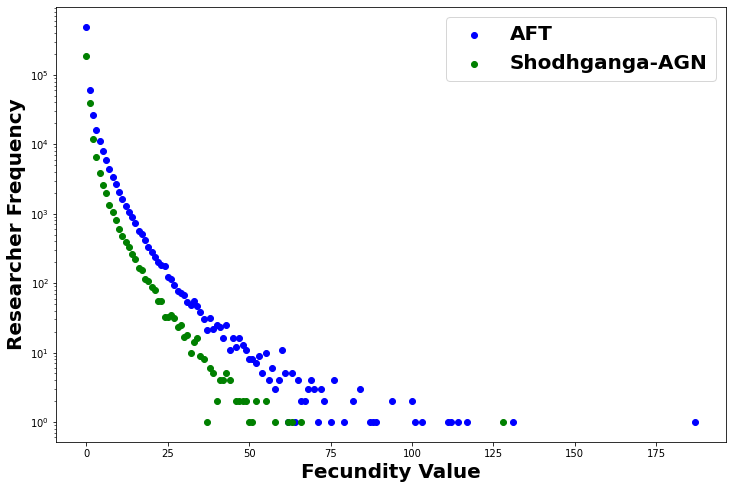

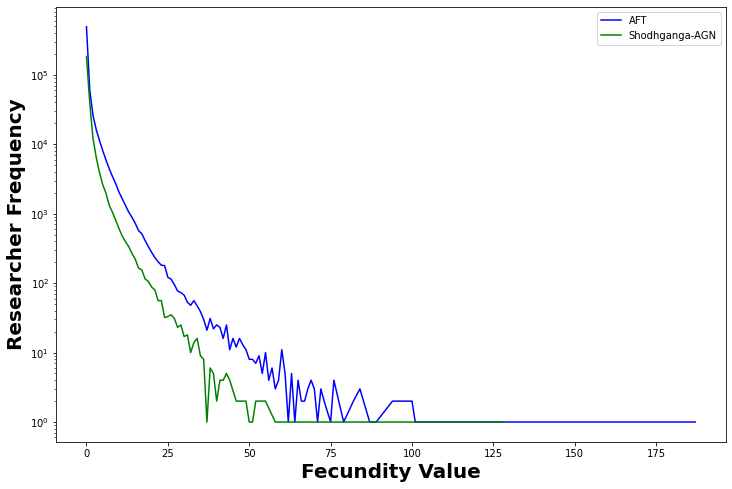

In [126]:
draw_graphs(aft_fecund,shodh_fecund,title='',xlabel='Fecundity Value',loc=f"{save_dir}/fecundity", bins=16)

In [127]:
aft_fertile= fertility_calculation(aft)
aft_fertile= list(aft_fertile.values())
#aft_fertile_dist = Counter(fertile.values())
shodh_fertile= fertility_calculation(shodh)
shodh_fertile= list(shodh_fertile.values())

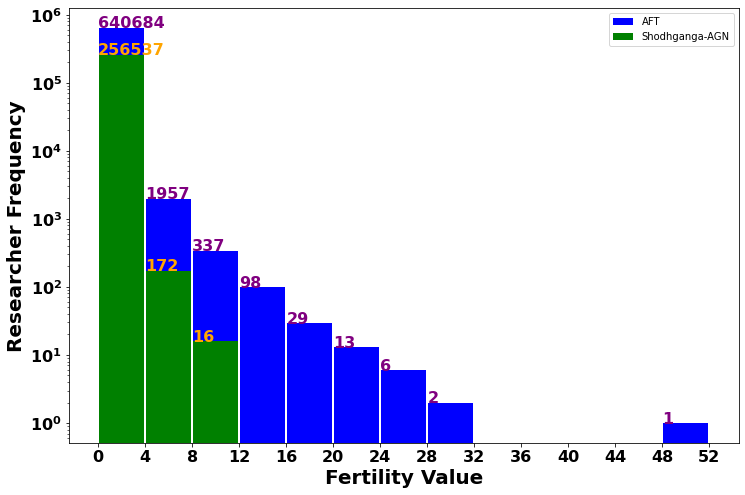

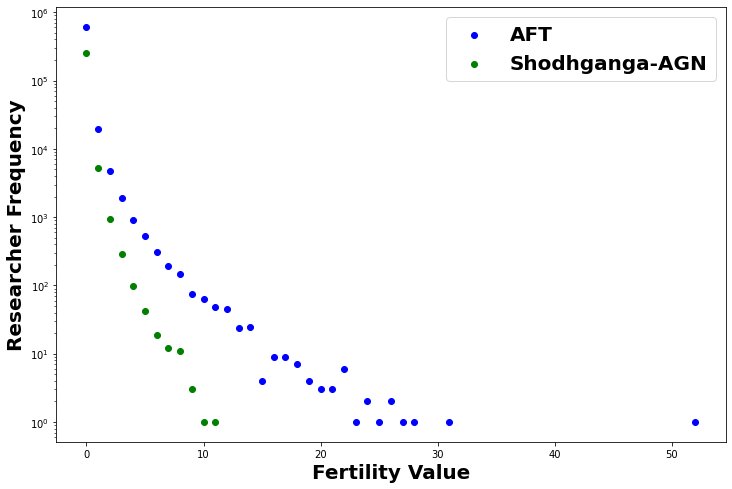

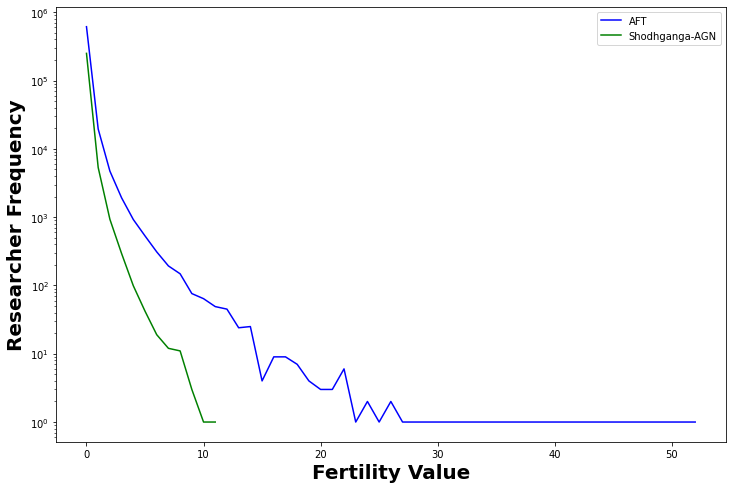

In [128]:
draw_graphs(aft_fertile,shodh_fertile,title='',xlabel='Fertility Value',loc=f"{save_dir}/fertility", bins=13)

In [13]:
aft_desc   = desc_calculation(aft)
aft_desc   = list(aft_desc.values())
shodh_desc = desc_calculation(shodh)
shodh_desc = list(shodh_desc.values())

In [14]:
min(aft_desc),max(aft_desc)

(0, 43812)

In [15]:
min(shodh_desc),max(shodh_desc)

(0, 261)

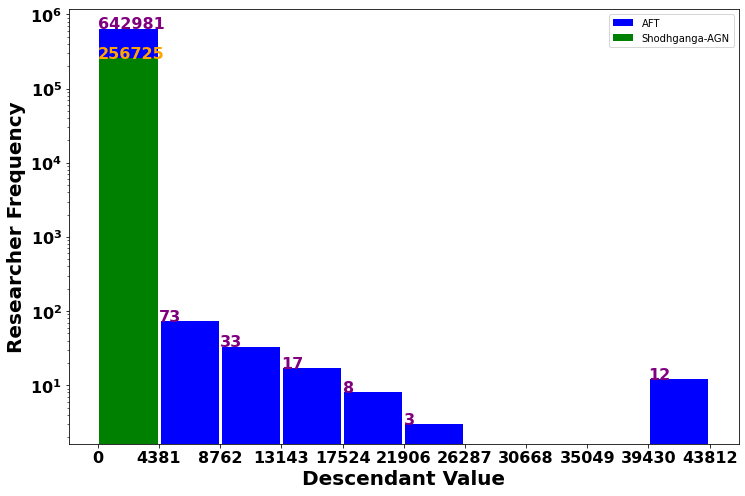

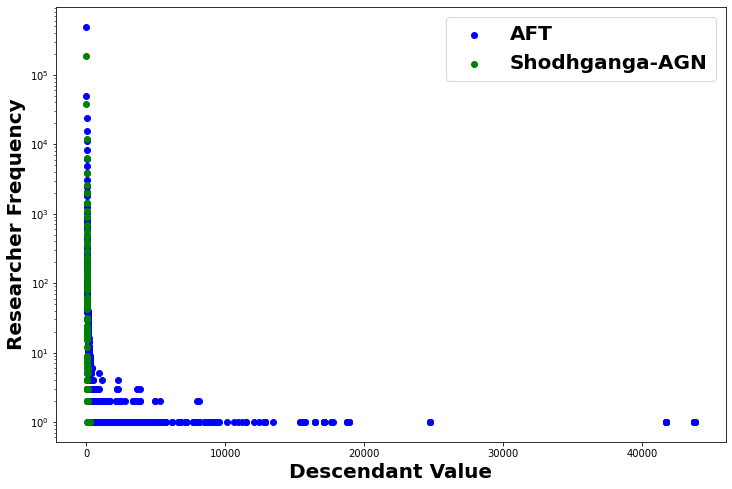

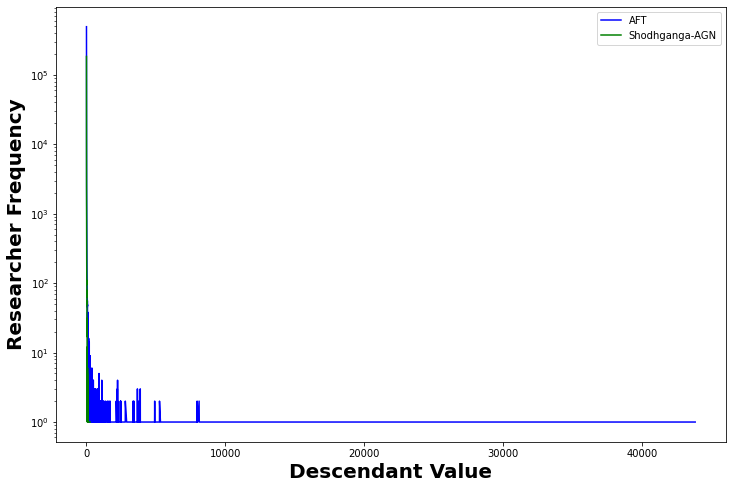

In [130]:
draw_graphs(aft_desc,shodh_desc,title='',xlabel='Descendant Value',loc=f"{save_dir}/descendant", bins=10)

In [131]:
# draw_bar_graph(aft_desc,shodh_desc,title='Decendants Distribution',ylabel='Researcher frequency',xlabel='Descendant Value',loc="", bins=10, text=True,print_bin=False)
# draw_scatter_graph(aft_desc,shodh_desc)
# draw_line_graph(aft_desc,shodh_desc)

In [132]:
aft_cousin   = cousins(aft)
aft_cousin   = list(aft_cousin.values())
shodh_cousin = cousins(shodh)
shodh_cousin = list(shodh_cousin.values())

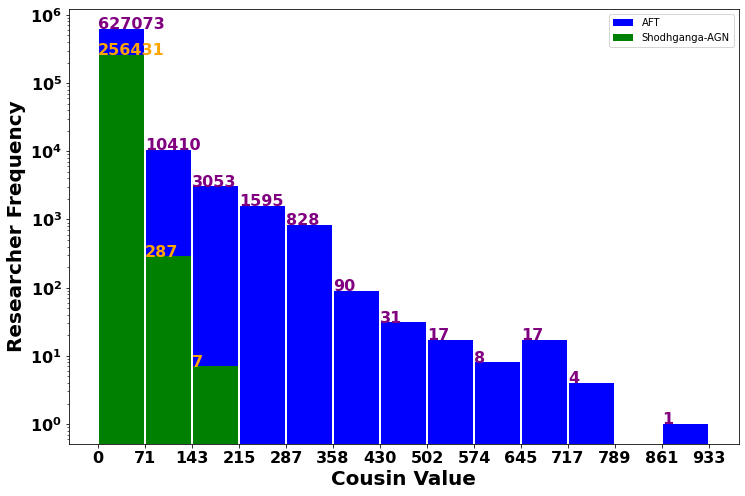

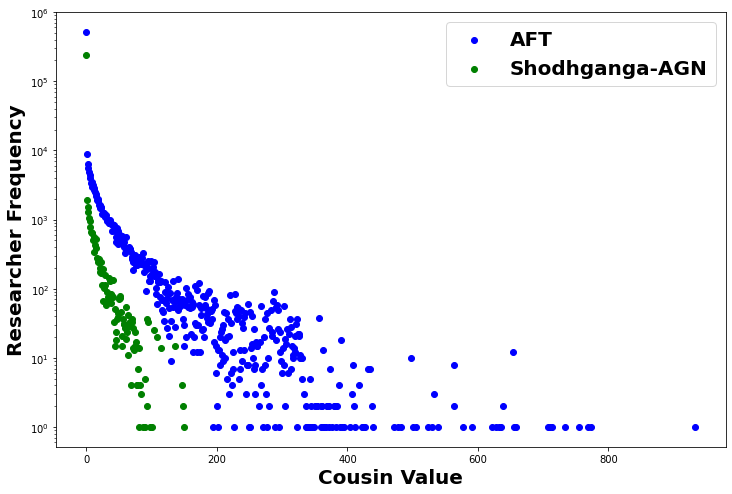

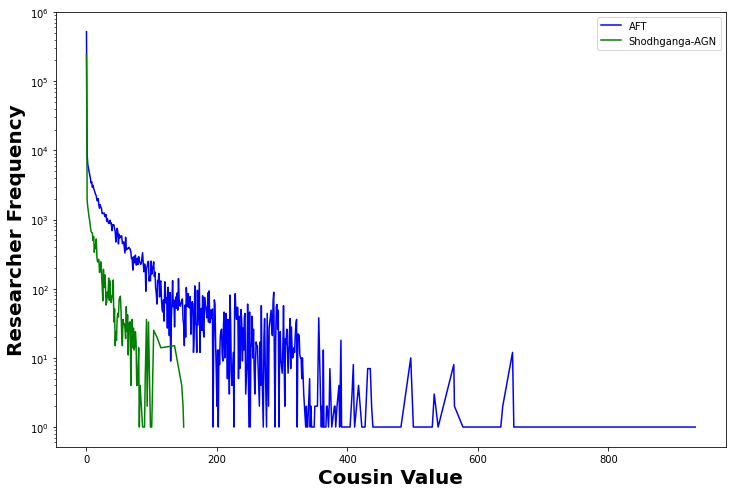

In [133]:
draw_graphs(aft_cousin,shodh_cousin,title='',xlabel='Cousin Value',loc=f"{save_dir}/cousin", bins=13)

In [134]:
# draw_bar_graph(aft_desc,shodh_desc,title='',ylabel='Researcher frequency',xlabel='Cousin Value',loc="", bins=10, text=True,print_bin=False)
# draw_scatter_graph(aft_desc,shodh_desc)
# draw_line_graph(aft_desc,shodh_desc)

In [135]:
aft_gen   = Generation(aft)
aft_gen   = list(aft_gen.values())
shodh_gen = Generation(shodh)
shodh_gen = list(shodh_gen.values())

completed :0 nodes
completed :100000 nodes
completed :200000 nodes
completed :300000 nodes
completed :400000 nodes
completed :500000 nodes
completed :600000 nodes
completed :0 nodes
completed :100000 nodes
completed :200000 nodes


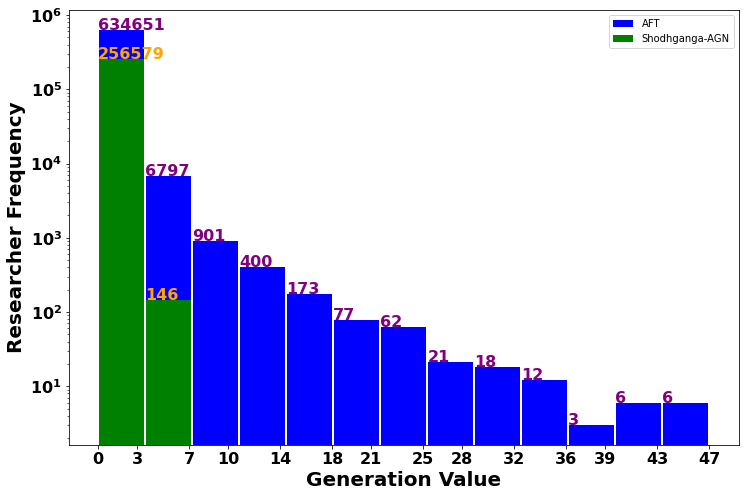

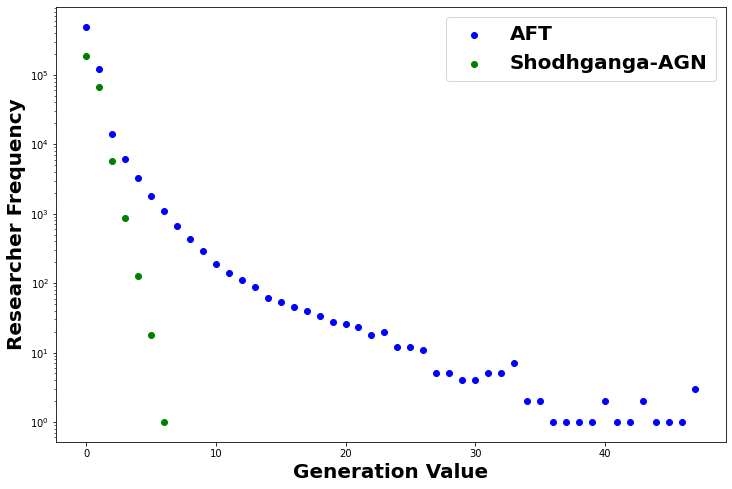

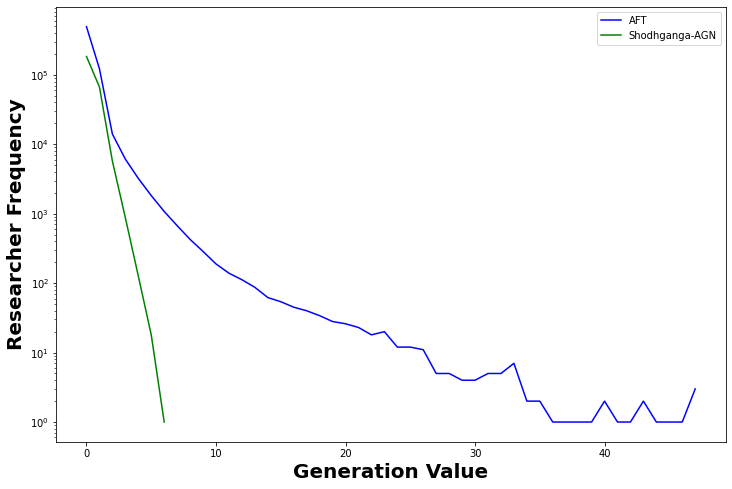

In [136]:
draw_graphs(aft_gen,shodh_gen,title='',xlabel='Generation Value',loc=f"{save_dir}/generation", bins=13)

In [137]:
aft_hindex_init   = child_deg(aft)
aft_hindex        = {key: int(aft_hindex_init[key]) for key in aft_hindex_init}
aft_hindex        = list(aft_hindex.values())
shodh_hindex_init = child_deg(shodh)
shodh_hindex      = {key: int(shodh_hindex_init[key]) for key in shodh_hindex_init}
shodh_hindex      = list(shodh_hindex.values())

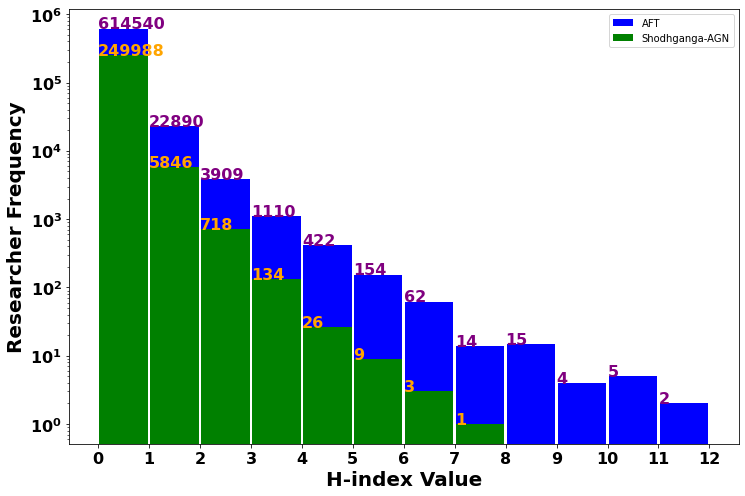

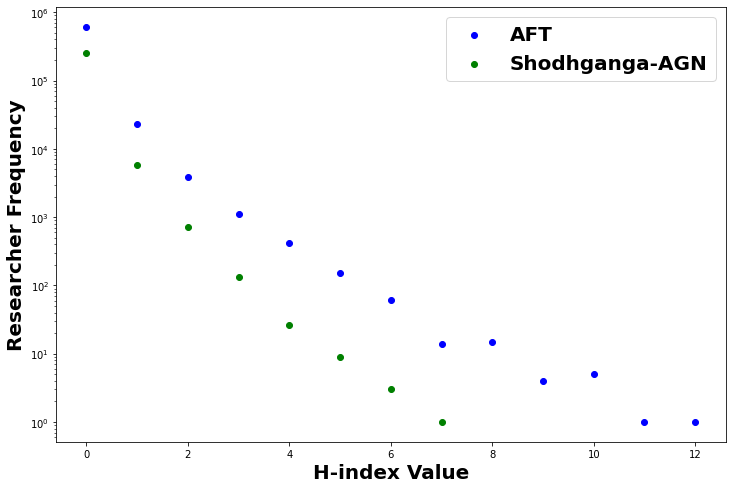

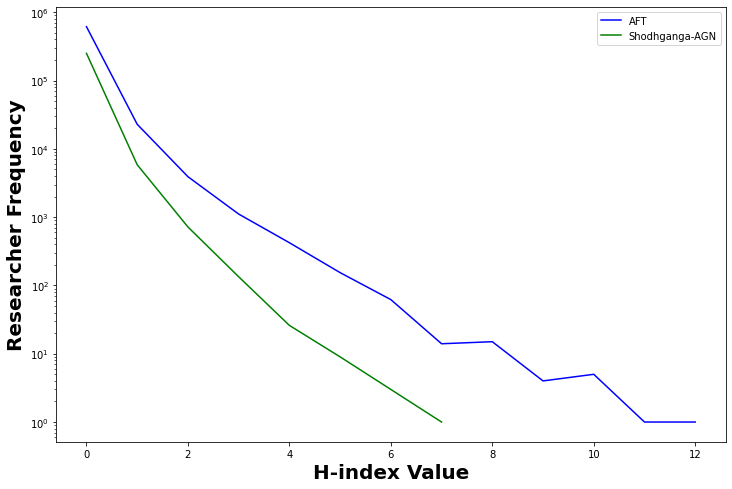

In [138]:
draw_graphs(aft_hindex,shodh_hindex,title='',xlabel='H-index Value',loc=f"{save_dir}/hindex", bins=12)

In [139]:
aft_gindex_init   = gm_index_mod(aft)
aft_gindex        = {key: int(aft_gindex_init[key]) for key in aft_gindex_init}
aft_gindex        = list(aft_gindex.values())
shodh_gindex_init = gm_index_mod(shodh)
shodh_gindex      = {key: int(shodh_gindex_init[key]) for key in shodh_gindex_init}
shodh_gindex      = list(shodh_gindex.values())

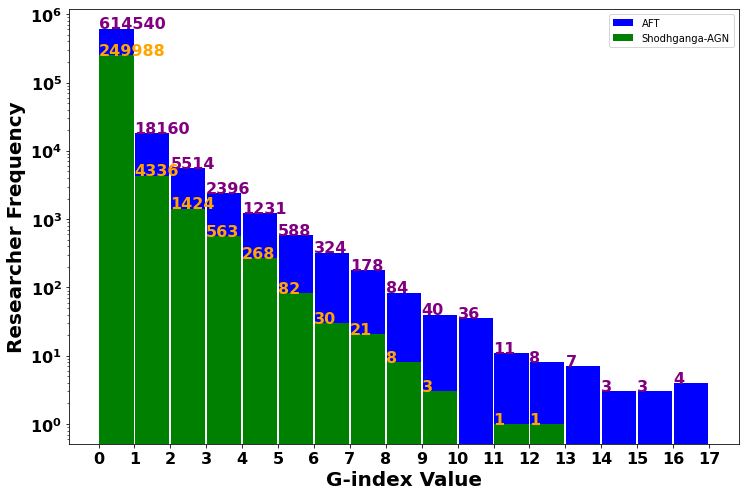

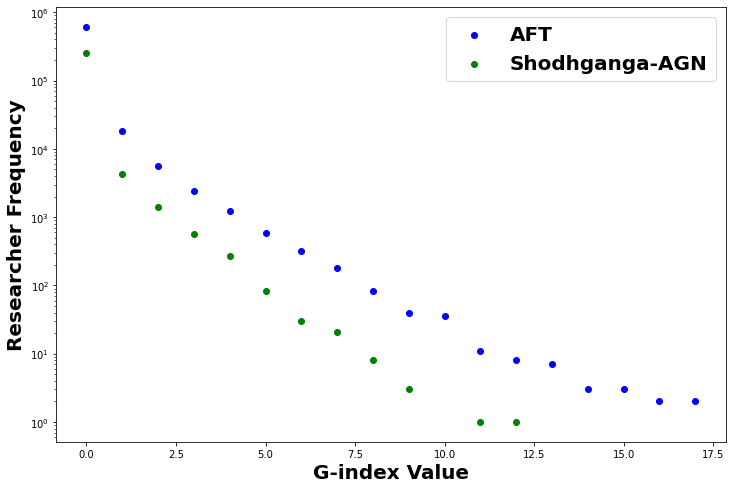

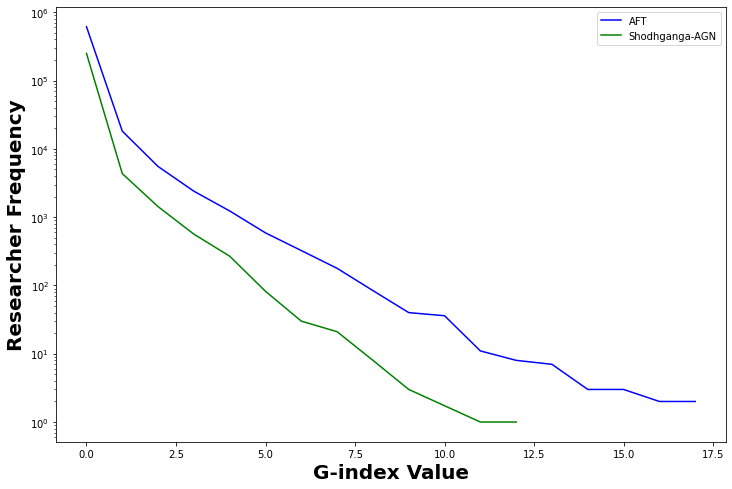

In [140]:
draw_graphs(aft_gindex,shodh_gindex,title='',xlabel='G-index Value',loc=f"{save_dir}/gindex", bins=17)

In [141]:
aft_in_dgr   = aft.in_degree()
aft_in_dgr   = dict(aft_in_dgr)
aft_in_dgr   = list(aft_in_dgr.values())
shodh_in_dgr = shodh.in_degree()
shodh_in_dgr = dict(shodh_in_dgr)
shodh_in_dgr = list(shodh_in_dgr.values())

In [ ]:
draw_graphs(aft_in_dgr,shodh_in_dgr,title='',xlabel='In-degree Value',loc=f"{save_dir}/indegree", bins=14)

In [79]:
from matplotlib import pyplot as plt

In [11]:
aft_desc   = desc_calculation(aft)
aft_desc   = list(aft_desc.values())
shodh_desc = desc_calculation(shodh)
shodh_desc = list(shodh_desc.values())

/home/dj/Desktop/Shodhganga_work/venv/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


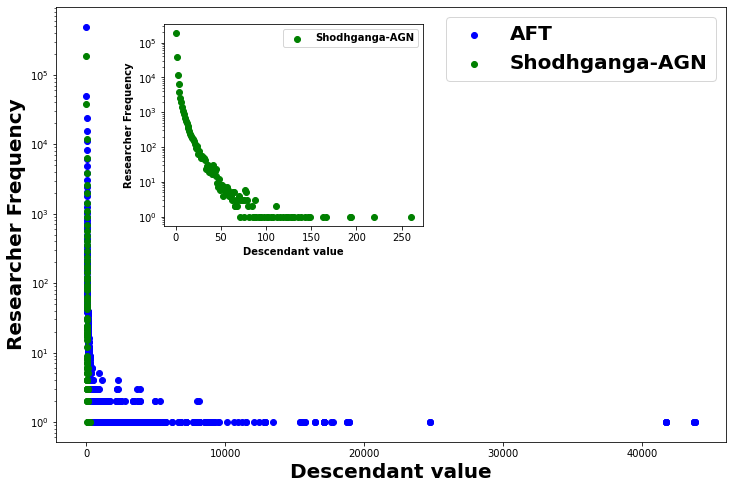

In [12]:
metric_dist1 = Counter(aft_desc)
metric_dist2 = Counter(shodh_desc)
metric_dist1_sort = sorted(metric_dist1.items())
metric_dist2_sort = sorted(metric_dist2.items())
deg1, cnt1 = zip(*metric_dist1_sort)
deg2, cnt2 = zip(*metric_dist2_sort)
fig1, ax1 = plt.subplots(figsize=(12,8))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.25, 0.5, 0.3, 0.35]

ax2 = fig1.add_axes([left, bottom, width, height])
ax2.scatter(deg2, cnt2, color="g", label="Shodhganga-AGN")
ax2.set_yscale('log')
ax2.set_ylabel("Researcher Frequency",fontweight='bold', fontsize=10)
ax2.set_xlabel("Descendant value",fontweight='bold', fontsize=10)
ax2.legend(prop={'size': 10,'weight':'bold'})

ax1.scatter(deg1, cnt1, color="b", label="AFT")
ax1.scatter(deg2, cnt2, color="g", label="Shodhganga-AGN")
#ax1.set_title("")
ax1.set_ylabel("Researcher Frequency",fontweight='bold', fontsize=20)
ax1.set_xlabel("Descendant value",fontweight='bold', fontsize=20)
ax1.set_yscale('log')
ax1.legend(prop={'size': 20,'weight':'bold'})
    #ax.set_xticks([d for d in deg])
    #ax.set_xticklabels(deg)
fig1.savefig("../shodh_aft_graphs/descendant_inset.pdf",bbox_inches='tight')
fig1.show()

In [44]:
save_dir

'../shodh_aft_graphs'